In [ ]:
import pandas as pd
#Correlation Matrix with Heatmap

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# from pandas_profiling import ProfileReport

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import label encoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
old=pd.DataFrame()
#Ordinal_encoder=preprocessing.OrdinalEncoder()
label_encoder = preprocessing.LabelEncoder()
dataset=pd.read_csv('/content/drive/MyDrive/1800Finaldescriptors4.csv')
dataset['Primary Odor']= label_encoder.fit_transform(dataset['Primary Odor'])
dataset = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]
#dataset.dropna(inplace=True)
dataset.fillna(0,inplace=True)
old['Primary Odor']=dataset['Primary Odor']
# #df=df.astype(int)
#dataset.drop_duplicates(inplace=True)
#df.dropna(inplace=True)
#df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# df=df.drop('NsLi',axis=1)
# df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Columns: 1876 entries, nAcid to Primary Odor
dtypes: float64(1449), int64(427)
memory usage: 52.8 MB


In [ ]:
dataset

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,Primary Odor
0,0,0.8136,0.661945,35.4408,28.683516,5,5,23,11,12,...,0.067779,0.661464,0.358538,0.349573,15.675379,23.682504,48.024171,0.842704,1.369575,0
1,0,1.4036,1.970093,49.1523,28.595102,0,0,23,9,14,...,-0.085171,17.888089,10.394916,23.862268,-38.337198,-446.055427,-1497.311195,1.380321,52.145274,0
2,0,0.6462,0.417574,45.3715,25.965516,0,0,22,10,12,...,0.084518,0.407330,0.717828,0.416869,10.141274,11.173691,24.071518,0.819917,1.542027,0
3,0,1.8994,3.607720,46.8935,25.501516,0,0,20,8,12,...,0.042375,1.159858,0.602411,0.755817,17.044492,19.856628,42.728128,0.891535,2.518086,0
4,0,4.3100,18.576100,74.7794,38.922274,0,0,32,14,18,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3681,0,-4.3042,18.526138,77.0271,72.486064,0,0,71,23,48,...,0.012996,0.573012,0.501657,0.478056,70.590693,104.178002,211.702519,0.968124,1.552725,68
3682,0,-1.7193,2.955992,62.1684,48.965790,0,0,47,17,30,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68
3683,0,-2.2953,5.268402,67.9916,55.152962,0,0,53,19,34,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68
3684,0,-3.8144,14.549647,80.5168,71.152478,0,0,69,23,46,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68


In [ ]:
dataset.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,Primary Odor
count,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,...,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000,3686.000000
mean,0.035811,0.240784,2.042778,40.058284,30.939267,1.943570,1.956321,28.703201,12.072165,16.631036,...,0.138273,0.467919,0.377161,0.350834,8.378270,14.945506,30.090734,0.459753,1.195581,17.179327
std,0.198552,1.409021,4.127252,17.053784,10.379519,3.099712,3.135907,10.151061,3.830989,6.813352,...,0.121851,1.763272,0.871059,2.331078,8.576227,22.912950,61.379474,0.344848,4.267271,15.004047
min,0.000000,-6.038400,0.000000,0.000000,2.406000,0.000000,0.000000,3.000000,2.000000,0.000000,...,-0.299989,0.000000,0.000000,0.000000,-38.337198,-446.055427,-1497.311195,0.000000,0.000000,0.000000
25%,0.000000,-0.555375,0.144552,27.534000,23.685516,0.000000,0.000000,21.000000,10.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,0.234400,0.652460,39.779450,29.872688,0.000000,0.000000,28.000000,12.000000,16.000000,...,0.122408,0.520368,0.437907,0.373560,7.734665,12.735475,25.860149,0.514797,1.340391,13.000000
75%,0.000000,1.051200,2.298862,50.229925,36.967032,6.000000,6.000000,35.000000,14.000000,20.000000,...,0.228762,0.562987,0.501694,0.432625,11.056380,21.506681,43.460827,0.720679,1.462575,30.000000
max,3.000000,11.572600,133.925071,198.036400,115.108682,24.000000,24.000000,113.000000,40.000000,74.000000,...,0.487794,83.794787,33.998688,135.223909,113.446500,782.346230,2279.572591,7.095799,197.579218,68.000000


In [ ]:

class_counts = dataset['Primary Odor'].value_counts()
class_weights = len(class_counts)/class_counts
dataset = dataset.sample(
    n=class_counts.max()*len(class_counts),
    weights=dataset['Primary Odor'].map(class_weights), 
    replace=True)

In [ ]:
dataset.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds,Primary Odor
count,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,...,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000,40641.000000
mean,0.067346,-0.052097,2.223906,39.457996,31.038934,1.864669,1.883049,28.924018,11.989247,16.934770,...,0.141843,0.690674,0.379020,0.335465,9.186374,15.423831,31.547106,0.478890,1.405129,33.994415
std,0.269453,1.490385,4.504739,17.726303,11.807334,2.972924,3.023665,11.734893,4.203604,7.961203,...,0.123226,3.182108,0.588585,1.432749,10.446298,19.929798,48.248596,0.328443,4.102248,19.956569
min,0.000000,-6.038400,0.000000,0.000000,2.406000,0.000000,0.000000,3.000000,2.000000,0.000000,...,-0.299989,0.000000,0.000000,0.000000,-38.337198,-446.055427,-1497.311195,0.000000,0.000000,0.000000
25%,0.000000,-0.685000,0.073333,26.449000,23.065516,0.000000,0.000000,21.000000,9.000000,12.000000,...,0.013787,0.385408,0.326531,0.156722,3.790326,2.214961,5.620867,0.233001,1.137506,17.000000
50%,0.000000,0.116800,0.503674,39.624100,29.070688,0.000000,0.000000,27.000000,11.000000,16.000000,...,0.136668,0.521201,0.447780,0.383511,7.768859,12.997635,25.810868,0.531811,1.352981,34.000000
75%,0.000000,0.819000,2.215930,48.758700,36.486274,6.000000,6.000000,35.000000,14.000000,20.000000,...,0.235579,0.563025,0.502821,0.443549,11.042334,22.020271,44.772491,0.712439,1.460127,51.000000
max,3.000000,11.572600,133.925071,198.036400,115.108682,24.000000,24.000000,113.000000,40.000000,74.000000,...,0.487794,83.794787,33.998688,135.223909,113.446500,782.346230,2279.572591,7.095799,197.579218,68.000000


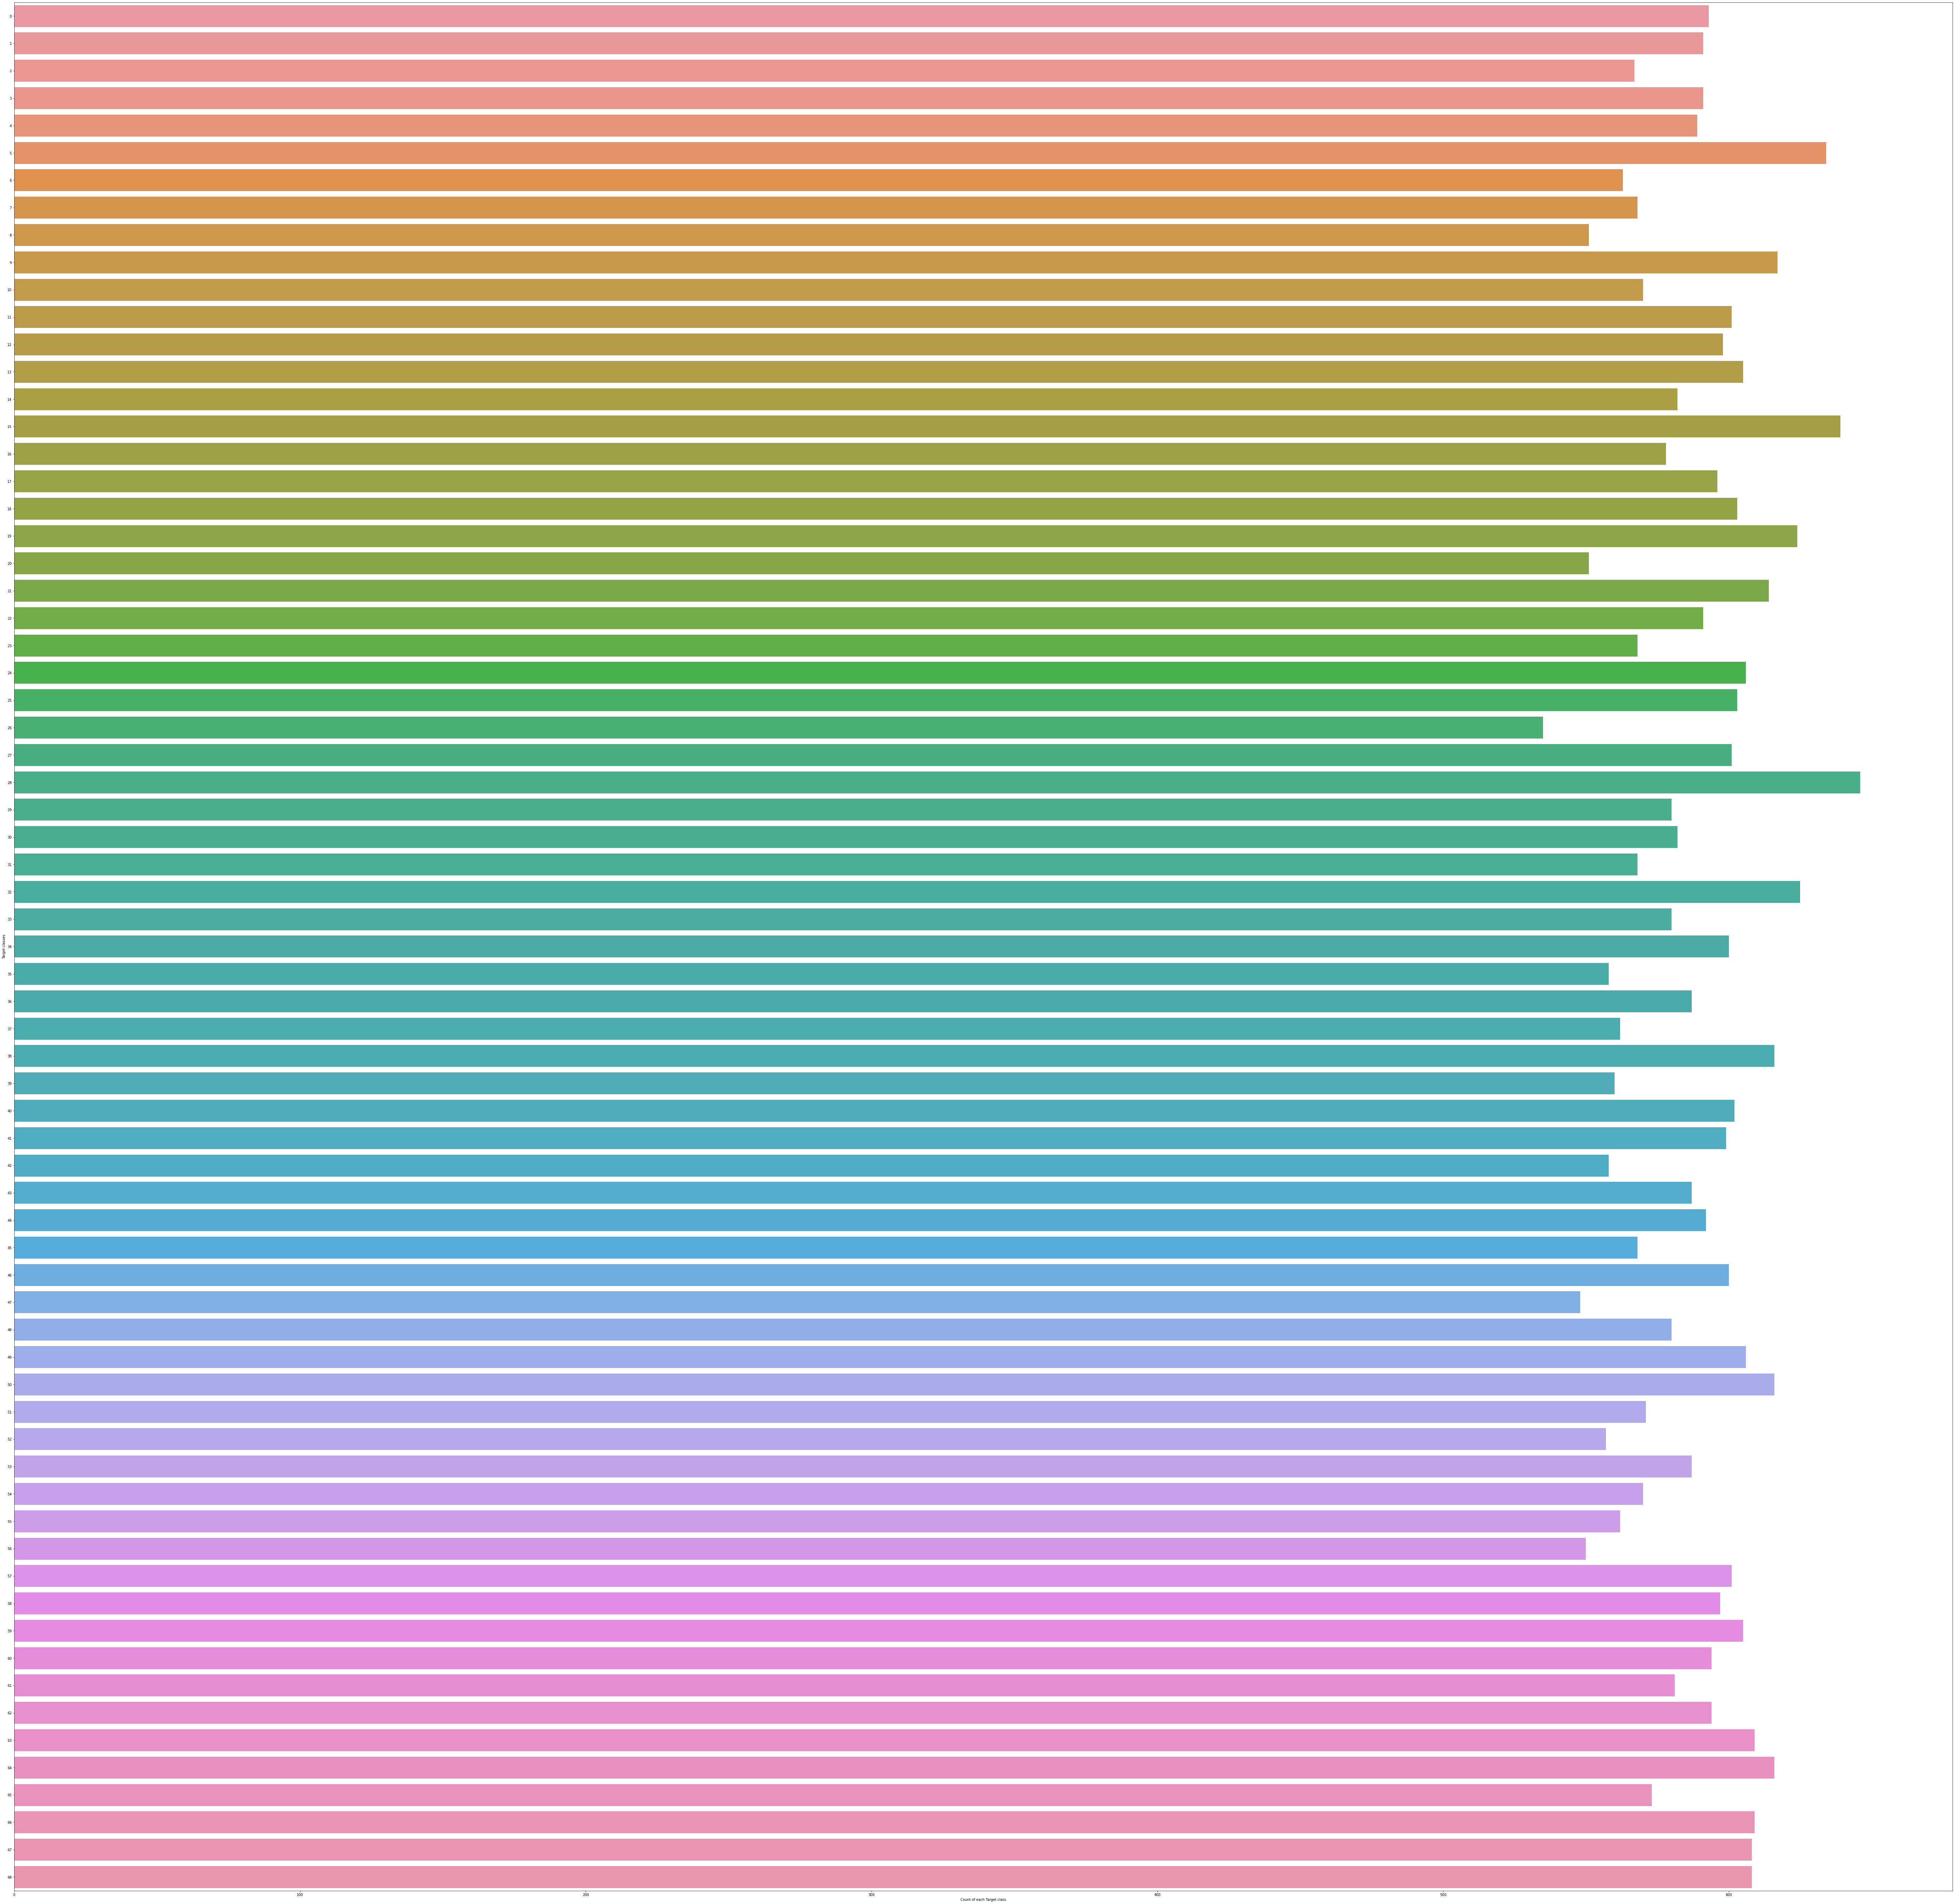

In [ ]:
plt.figure(figsize=(100,100))
sns.countplot(y=dataset['Primary Odor'] ,data=dataset)

plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

In [ ]:
#Using Pearson Correlation
# plt.figure(figsize=(200,200))

cor = dataset.corr(method='pearson')
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# plt.show()
#Correlation with output variable

cor_target= abs(cor['Primary Odor'])


#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]

print(relevant_features)

nS              0.208533
AATS8i          0.207252
AATSC1i         0.206670
MATS1i          0.204182
SM1_Dzs         0.224002
SpMin6_Bhm      0.211634
SpMin7_Bhm      0.214193
minHBa          0.200198
gmin            0.227193
MAXDN           0.217826
ETA_Psi_1       0.205129
ETA_dPsi_A      0.205983
Primary Odor    1.000000
Name: Primary Odor, dtype: float64


In [ ]:
print(len(relevant_features.keys()))

13


In [ ]:
# #take only integer values and make dummies

# df=dataset.select_dtypes(include='int64')
# df=df.drop('Primary Odor',axis=1)
# df = pd.get_dummies(dataset, columns = df.columns)
# for i in df.columns:
#   df[i].fillna(value=0, inplace=True)
# df['Primary Odor']=dataset['Primary Odor']

In [ ]:
# #removing all the columns which have less that 1 unique values
# for col in dataset.columns:
#     if len(dataset[col].unique()) <= 1:
#         dataset.drop(col,inplace=True,axis=1)
# dataset.info()  

In [ ]:
# categorical_val = []
# continous_val = []
# print('==============================')
# print(dataset.nunique(axis=0))
# for column in dataset.columns:
    
#     #print(f"{column} : {df[column].unique()}")
    
#     if len(dataset[column].unique()) < 10:
#         categorical_val.append(column)
#     else:
#         continous_val.append(column)

In [ ]:
# for i in categorical_val:
#   dataset[i].fillna(value=0, inplace=True)
# for x in continous_val:
#   mean_value=dataset[x].mean()
#   dataset[x].fillna(value=mean_value, inplace=True)

In [ ]:
# #Make categorical dummies and continues as scaled
# df = pd.get_dummies(dataset, columns = categorical_val)
# from sklearn.preprocessing import StandardScaler
# continous_val.remove('Primary Odor')
# s_sc = StandardScaler()
# col_to_scale = continous_val
# df[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [ ]:
# df['Primary Odor']=dataset['Primary Odor']
# df.info()

In [ ]:
df=dataset

In [ ]:
# #Using Pearson Correlation
# # plt.figure(figsize=(200,200))
# cor = df.corr(method='pearson')
# # sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# # plt.show()
# #Correlation with output variable
# cor_target = abs(cor["Primary Odor"])
# #Selecting highly correlated features
# relevant_features = cor_target[cor_target>0.2]
# print(len(relevant_features.keys()))
# print(relevant_features)

In [ ]:

print(relevant_features.keys())
print(len(relevant_features.keys()))


Index(['nS', 'AATS8i', 'AATSC1i', 'MATS1i', 'SM1_Dzs', 'SpMin6_Bhm',
       'SpMin7_Bhm', 'minHBa', 'gmin', 'MAXDN', 'ETA_Psi_1', 'ETA_dPsi_A',
       'Primary Odor'],
      dtype='object')
13


In [ ]:
import numpy as np
def trimm_correlated(df_in, threshold):
    df_corr = df_in.corr(method='pearson')
    df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > threshold).any()
    un_corr_idx = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
    df_out = df_in[un_corr_idx]
    return df_out
data=trimm_correlated(df[relevant_features.keys()],0.99)  

In [ ]:
len(data.columns)

12

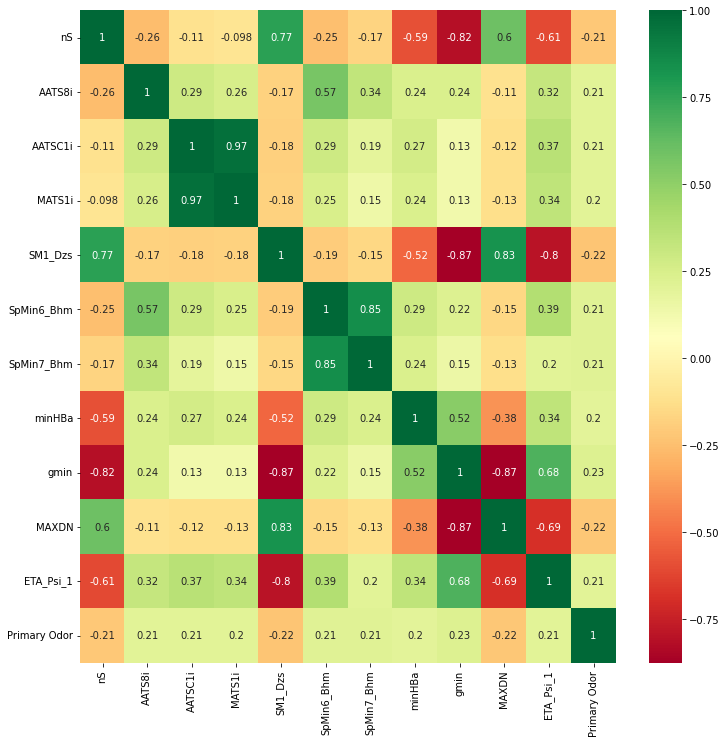

In [ ]:

#Correlation Matrix with Heatmap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#get correlations of each features in dataset
corrmat =data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier

X = data
X= X.drop('Primary Odor',axis=1)
y = df['Primary Odor']

In [ ]:
#Univariate Selection
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# X=df.drop('Primary Odor', axis=1)
# y=df['Primary Odor']
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

         Specs     Score
8         gmin  3.944969
9        MAXDN  3.939400
4      SM1_Dzs  3.768303
7       minHBa  3.690689
5   SpMin6_Bhm  3.570764
3       MATS1i  3.371739
2      AATSC1i  3.361229
6   SpMin7_Bhm  3.352407
1       AATS8i  2.461639
10   ETA_Psi_1  2.157084


[0.00808178 0.09189165 0.09150641 0.09476232 0.09340452 0.1173521
 0.1043735  0.10511883 0.10454708 0.10599273 0.08296906]


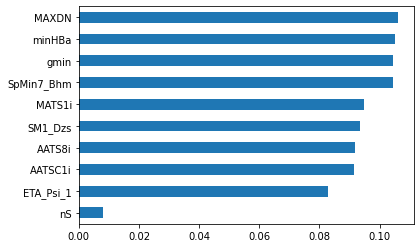

In [ ]:
#Feature Importance By smallest connection
import pandas as pd
import numpy as np

# X=df.drop('Primary Odor', axis=1)
# y=df['Primary Odor']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(10).plot(kind='barh')
plt.show()

[0.00473399 0.07576709 0.0961076  0.09182038 0.11713507 0.10390511
 0.10019991 0.10316517 0.11684232 0.12633645 0.06398689]


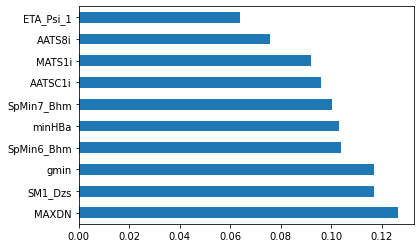

In [ ]:
#Feature Importance By largest connection
import pandas as pd
import numpy as np

# X=df.drop('Primary Odor', axis=1)
# y=df['Primary Odor']
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5f91f3b90>,
      dtype=object)

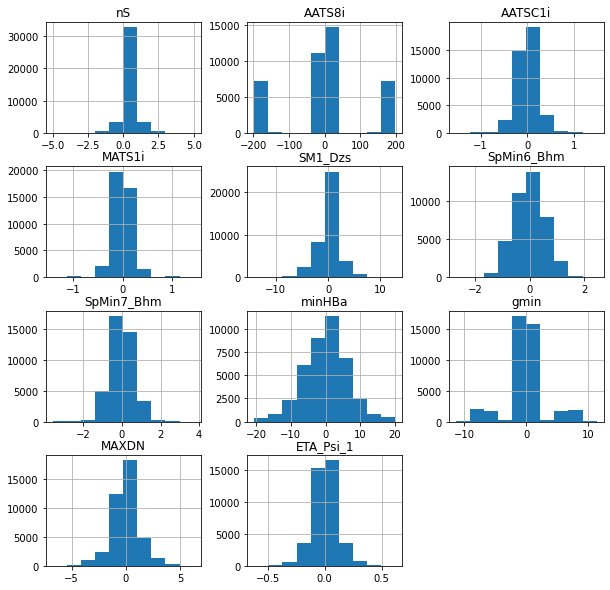

In [ ]:
X.diff().hist(figsize=(10, 10))

In [ ]:
print(data.columns)
print(len(data.columns))

Index(['nS', 'AATS8i', 'AATSC1i', 'MATS1i', 'SM1_Dzs', 'SpMin6_Bhm',
       'SpMin7_Bhm', 'minHBa', 'gmin', 'MAXDN', 'ETA_Psi_1', 'Primary Odor'],
      dtype='object')
12


In [ ]:
print(X.shape,y.shape)

(40641, 11) (40641,)


In [ ]:
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# RF = RandomForestClassifier()
# sfs1 = SFS(RF, 
#            k_features=10, 
#            forward=True, 
#            floating=True, 
#            verbose=2,
#            scoring='accuracy',
#            cv=0)

# sfs1 = sfs1.fit(X, y)

In [ ]:
# from imblearn.over_sampling import RandomOverSampler
# oversample = RandomOverSampler(sampling_strategy='minority')
# X, y = oversample.fit_resample(X, y)

In [ ]:
# print(len(data.columns))



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# # # Max ABS Scaling the dataset
# scaler = preprocessing.RobustScaler().fit(X_train)

# X_train=scaler.transform(X_train)


# X_test=scaler.transform(X_test)

In [ ]:
# quantile_transformer = preprocessing.PowerTransformer()
# X_train=quantile_transformer.fit_transform(X_train)
# X_test=quantile_transformer.transform(X_test)


In [ ]:
# #Standard Scaling the Dataset
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler().fit(X_train)
# print(scaler.mean_,scaler.scale_)
# X_train=scaler.transform(X_train)
# X_test=scaler.transform(X_test)

In [ ]:
# #Min Max Scaling the dataset
# scaler = preprocessing.MinMaxScaler().fit(X_train)

# X_train=scaler.transform(X_train)


# X_test=scaler.transform(X_test)

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(abs(X_train), abs(y_train))
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [1.76127945e+04 4.86215913e+05 2.08792612e+03 1.59196886e+03
 1.96011348e+04 2.65091540e+03 3.63092270e+03 1.51829871e+04
 5.45063048e+04 5.37428012e+03 1.49251532e+02]
Columns:  Index(['nS', 'AATS8i', 'AATSC1i', 'MATS1i', 'SM1_Dzs', 'SpMin6_Bhm',
       'SpMin7_Bhm', 'minHBa', 'gmin', 'MAXDN', 'ETA_Psi_1'],
      dtype='object')


In [ ]:
ft = SelectKBest(f_classif, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)


Score:  [334.98792417 268.66128205 306.4886707  260.35426046 326.39462235
 340.64812168 290.05154283 214.11588818 419.89170005 242.54792843
 347.71306518]
Columns:  Index(['nS', 'AATS8i', 'AATSC1i', 'MATS1i', 'SM1_Dzs', 'SpMin6_Bhm',
       'SpMin7_Bhm', 'minHBa', 'gmin', 'MAXDN', 'ETA_Psi_1'],
      dtype='object')


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import matthews_corrcoef,cohen_kappa_score,roc_auc_score
from sklearn.metrics import accuracy_score
def all_metrices(y_test,y_pred):
  acc=accuracy_score(y_test, y_pred)
  #auc=roc_auc_score(y_test,y_pred,average='micro')
  precision=precision_score(y_test, y_pred,average='micro')
  recall=recall_score(y_test, y_pred,average='micro')
  f1=f1_score(y_test, y_pred,average='micro')
  mcc=matthews_corrcoef(y_test,y_pred)
  kappa=cohen_kappa_score(y_test,y_pred)

  print('Accuracy: %.2f' % (acc*100))
  #print('Roc_Auc Score: %.2f' % (auc*100))
  print('Precision: %.2f' % (precision*100))
  print('recall: %.2f' % (recall*100))
  print('fl score: %.2f' % (f1*100))
  print('Mcc Score: %.2f' % (mcc))
  print('Kappa score: %.2f' % (kappa))
  print('\n')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train):
    if train:
        pred = clf.predict(X_train)
        
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        # print(f"Accuracy Score: {accuracy_score(y_train, pred,) * 100:.2f}%")
        # print("_______________________________________________")
        # print(f"CLASSIFICATION REPORT:\n{clf_report}")
        # print("_______________________________________________")
        # print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        all_metrices(y_train,pred)
    elif train==False:
        pred = clf.predict(X_test)
        
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        # print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        # print("_______________________________________________")
        # print(f"CLASSIFICATION REPORT:\n{clf_report}")
        # print("_______________________________________________")
        # print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        all_metrices(y_test,pred)

In [ ]:
import pandas as pd
!pip install pyttsx3
import pyttsx3
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier,_tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import csv
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy: 98.73
Precision: 98.73
recall: 98.73
fl score: 98.73
Mcc Score: 0.99
Kappa score: 0.99


Test Result:
Accuracy: 96.79
Precision: 96.79
recall: 96.79
fl score: 96.79
Mcc Score: 0.97
Kappa score: 0.97




In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy: 94.64
Precision: 94.64
recall: 94.64
fl score: 94.64
Mcc Score: 0.95
Kappa score: 0.95


Test Result:
Accuracy: 91.86
Precision: 91.86
recall: 91.86
fl score: 91.86
Mcc Score: 0.92
Kappa score: 0.92




In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy: 98.73
Precision: 98.73
recall: 98.73
fl score: 98.73
Mcc Score: 0.99
Kappa score: 0.99


Test Result:
Accuracy: 97.01
Precision: 97.01
recall: 97.01
fl score: 97.01
Mcc Score: 0.97
Kappa score: 0.97




In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy: 90.20
Precision: 90.20
recall: 90.20
fl score: 90.20
Mcc Score: 0.90
Kappa score: 0.90


Test Result:
Accuracy: 87.91
Precision: 87.91
recall: 87.91
fl score: 87.91
Mcc Score: 0.88
Kappa score: 0.88




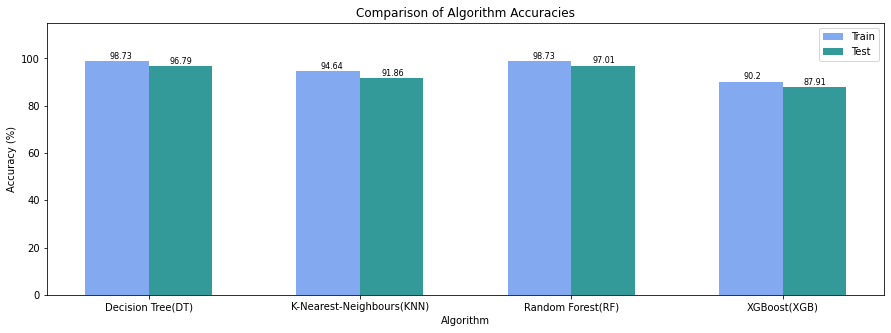

In [ ]:
# data to plot
n_groups = 4
algorithms = ('Decision Tree(DT)', 'K-Nearest-Neighbours(KNN)','Random Forest(RF)','XGBoost(XGB)')
train_accuracy = (accuracy_score(y_train, tree_clf.predict(X_train))*100, 
                  accuracy_score(y_train, knn_clf.predict(X_train))*100, 
                  accuracy_score(y_train, rf_clf.predict(X_train))*100,
                  accuracy_score(y_train, xgb_clf.predict(X_train))*100
                  )
test_accuracy = (accuracy_score(y_test, tree_clf.predict(X_test))*100, 
                 accuracy_score(y_test, knn_clf.predict(X_test))*100, 
                 accuracy_score(y_test, rf_clf.predict(X_test))*100,
                 accuracy_score(y_test, xgb_clf.predict(X_test))*100
                
                 )

# create plot
fig, ax = plt.subplots(figsize=(15, 5))
index = np.arange(n_groups)
bar_width = 0.3
opacity = 0.8
rects1 = plt.bar(index, train_accuracy, bar_width, alpha = opacity, color='Cornflowerblue', label='Train')
rects2 = plt.bar(index + bar_width, test_accuracy, bar_width, alpha = opacity, color='Teal', label='Test')
plt.xlabel('Algorithm') # x axis label
plt.ylabel('Accuracy (%)') # y axis label
plt.ylim(0, 115)
plt.title('Comparison of Algorithm Accuracies') # plot title
plt.xticks(index + bar_width * 0.5, algorithms) # x axis data labels
plt.legend(loc = 'upper right') # show legend
for index, data in enumerate(train_accuracy):
    plt.text(x = index - 0.035, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
for index, data in enumerate(test_accuracy):
    plt.text(x = index + 0.25, y = data + 1, s = round(data, 2), fontdict = dict(fontsize = 8))
plt.show()

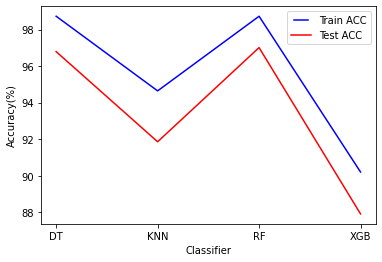

<Figure size 432x720 with 0 Axes>

In [ ]:
from matplotlib.legend_handler import HandlerLine2D
algo=('DT', 'KNN','RF','XGB')
line1, = plt.plot(algo, train_accuracy, 'b', label="Train ACC")
line2, = plt.plot(algo, test_accuracy, 'r', label="Test ACC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy(%)')
plt.xlabel('Classifier')
plt.figure(figsize = (6, 10))
plt.show()

In [ ]:
import joblib
joblib.dump(rf_clf, "/content/drive/MyDrive/random_forest.joblib")

['/content/drive/MyDrive/random_forest.joblib']

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/1800Finaldescriptors4.csv')
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df2=pd.DataFrame()

df2['Primary Odor']=df1['Primary Odor']
df1['Primary Odor']= label_encoder.fit_transform(df1['Primary Odor'])
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2.drop_duplicates(inplace=True)
df1.drop_duplicates(inplace=True)
df3['Primary Odor']=df2['Primary Odor']
df3['Primary Odor']= label_encoder.fit_transform(df3['Primary Odor'])
df4=pd.DataFrame()
df4['name']=df2['Primary Odor']
df4['value']=df3['Primary Odor']
df4.to_csv('/content/drive/MyDrive/Odors.csv')